In [1]:
from scipy.sparse import eye, csr_matrix, spdiags
from scipy.sparse.linalg import eigs, spsolve
import sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#sys.path.append("D:/Google Drive/Python/QD-energy/Lib/")
sys.path.append("/Users/KP/Google/Python/QD-energy/Lib/")
#from Lib import geometry, matrix, parameter
import geometry
import matrix
import parameter
from QD import int_cyl, Builder, Solver


In [2]:
"""""""""""""""""""""  QD Dimension  """""""""""""""""""""""
" materials = [Material1, Material2, Material3]            "
" radius = [Mat1's radius, Mat2's radius                   "
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# for  QD
materials1 = ['ZnSe', 'CdS']
#radius1 = [1.7e-9, 1.4e-9]  # from outside to inside
#materials1 = [ 'InP']
#radius1 = [2e-9]  # from outside to inside

dr = 1.45e-10
dz = 1.45e-10
#field = -400

In [54]:
a = Builder(dr,dz)
a.QD(['ZnSe','CdS'], [3.4e-9, 3e-9])
a.matrix()
b = Solver()
b.solve(a)
b.self_consistency(a, 20, charges = 'exciton', image_charge = Fal)
b.overlap_integral(a)
#1240/b.energy

Bulk Eg = 1.9
mesh size = 39 x 76 = 2964
Iteration 0, E. difference : 0.0535, Energy : 2.4975
Iteration 1, E. difference : 0.0050, Energy : 2.4925


0.9254356597348998

In [71]:
dz*28

4.06e-09

In [72]:
core_radi = dr * np.arange(4, 21, 3)
shell = dr * np.arange(0, 28, 3)

wvl_data = np.zeros((len(core_radi), len(shell)))
OI_data = np.zeros((len(core_radi), len(shell)))
for i, val1 in enumerate(core_radi):
    for j, val2 in enumerate(shell):
        print (val1, val2)
        a = Builder(dr,dz)
        a.QD(materials1, [val1+val2, val1])
        a.matrix()
        b = Solver()
        b.solve(a)
        eo = b.energy.copy()
        b.self_consistency(a, 20, charges = 'exciton', image_charge = True)
        ex = b.energy.copy()
        #print ('Exx : {}'.format(b1.energy))
        print ('E0 : {}, Ex : {}'.format(eo, b.energy))
        wvl_data[i,j] = 1240/ex
        OI_data[i,j] = b.overlap_integral(a)
        
        del a, b

        #exx1 = b1.energy

5.8e-10 0.0
Bulk Eg = 1.9
mesh size = 19 x 37 = 703
Iteration 0, E. difference : 0.4103, Energy : 5.1081
Iteration 1, E. difference : 0.0033, Energy : 5.1047
E0 : 5.518346145719687, Ex : 5.104681738676303
5.8e-10 4.3499999999999995e-10
Bulk Eg = 1.9
mesh size = 22 x 43 = 946
Iteration 0, E. difference : 0.2394, Energy : 3.9035
Iteration 1, E. difference : 0.0027, Energy : 3.9008
E0 : 4.14296536923066, Ex : 3.9008003508765245
5.8e-10 8.699999999999999e-10
Bulk Eg = 1.9
mesh size = 25 x 49 = 1225
Iteration 0, E. difference : 0.1640, Energy : 3.3004
Iteration 1, E. difference : 0.0022, Energy : 3.2982
E0 : 3.4643709608941604, Ex : 3.2981838746870147
5.8e-10 1.305e-09
Bulk Eg = 1.9
mesh size = 28 x 55 = 1540
Iteration 0, E. difference : 0.1253, Energy : 3.0495
Iteration 1, E. difference : 0.0021, Energy : 3.0474
E0 : 3.1747604689247266, Ex : 3.047358560615997
5.8e-10 1.7399999999999998e-09
Bulk Eg = 1.9
mesh size = 31 x 61 = 1891
Iteration 0, E. difference : 0.1019, Energy : 2.9282
Iterati

Iteration 0, E. difference : 0.0328, Energy : 2.3105
E0 : 2.3432452516318194, Ex : 2.3095843715463764
1.885e-09 1.7399999999999998e-09
Bulk Eg = 1.9
mesh size = 40 x 79 = 3160
Iteration 0, E. difference : 0.0273, Energy : 2.2508
E0 : 2.2780268038144316, Ex : 2.2500200131121693
1.885e-09 2.175e-09
Bulk Eg = 1.9
mesh size = 43 x 85 = 3655
Iteration 0, E. difference : 0.0232, Energy : 2.2192
E0 : 2.2423735648941037, Ex : 2.2182940070513504
1.885e-09 2.61e-09
Bulk Eg = 1.9
mesh size = 46 x 91 = 4186
Iteration 0, E. difference : 0.0198, Energy : 2.2005
Iteration 1, E. difference : 0.0011, Energy : 2.1994
E0 : 2.220223511328352, Ex : 2.1993933063119586
1.885e-09 3.0449999999999997e-09
Bulk Eg = 1.9
mesh size = 49 x 97 = 4753
Iteration 0, E. difference : 0.0169, Energy : 2.1888
Iteration 1, E. difference : 0.0013, Energy : 2.1875
E0 : 2.2057398354413005, Ex : 2.1875367632781892
1.885e-09 3.4799999999999996e-09
Bulk Eg = 1.9
mesh size = 52 x 103 = 5356
Iteration 0, E. difference : 0.0144, Ener

Text(0, 0.5, 'Shell thickness (nm)')

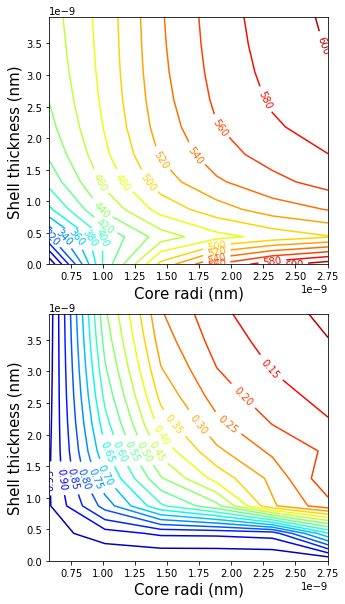

In [93]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5,10))
ax1 = plt.subplot(2,1,1)
ax1 = plt.contour(core_radi, shell, wvl_data.T, levels = 20,  cmap = 'jet')
plt.clabel(ax1, inline=1, fontsize=10, fmt = '%1d',)
plt.xlabel('Core radi (nm)', fontsize = 15)
plt.ylabel('Shell thickness (nm)', fontsize = 15)
ax2 = plt.subplot(2,1,2)
ax2 = plt.contour(core_radi, shell, OI_data.T, levels = 20,  cmap = 'jet_r')
plt.clabel(ax2, inline=1, fontsize=10, fmt = '%1.2f')
plt.xlabel('Core radi (nm)', fontsize = 15)
plt.ylabel('Shell thickness (nm)', fontsize = 15)


In [48]:
a0 = Builder(dr,dz)
a0.QD(materials1, radius1)
a0.matrix()
b0 = Solver()
b0.solve(a0)
eo0 = b0.energy
print ('E0 : {}'.format(b0.energy))
#ex1 = b1.energy
#b1.self_consistency(a1, 20, charges = 'biexciton', image_charge = True)
#print ('Exx : {}'.format(b1.energy))
#exx1 = b1.energy

Bulk Eg = 1.5
mesh size = 27 x 53 = 1431
E0 : 2.4647863612843826


In [16]:
a1 = Builder(dr,dz)
a1.QD(materials1, radius1)
a1.matrix()
b1 = Solver()
b1.solve(a1)
eo1 = b1.energy
print ('E0 : {}'.format(b1.energy))
b1.self_consistency(a1, 10, delta1 = 0.1, delta2 = 0.2, charges = 'hole', image_charge = True)
print ('Ex : {}'.format(b1.energy))
#ex1 = b1.energy
#b1.self_consistency(a1, 20, charges = 'biexciton', image_charge = True)
#print ('Exx : {}'.format(b1.energy))
#exx1 = b1.energy

Bulk Eg = 1.5
mesh size = 27 x 53 = 1431
E0 : 2.464786361284385
Iteration 0, E. difference : 0.0822, Energy : 2.3826
Ex : 2.3826257390538346


In [17]:
a2 = Builder(dr,dz)
a2.QD(materials1, radius1)
a2.matrix()
b2 = Solver()
b2.solve(a2)
eo2 = b2.energy
print ('E0 : {}'.format(b2.energy))
b2.self_consistency(a2, 10, delta1 = 0.1, delta2 = 0.2, charges = 'two holes', image_charge = True)
print ('Ex : {}'.format(b2.energy))
#ex1 = b1.energy
#b1.self_consistency(a1, 20, charges = 'biexciton', image_charge = True)
#print ('Exx : {}'.format(b1.energy))
#exx1 = b1.energy

Bulk Eg = 1.5
mesh size = 27 x 53 = 1431
E0 : 2.464786361284384
Iteration 0, E. difference : 0.0703, Energy : 2.3944
Ex : 2.395380497665003


In [52]:
b.plot(a)
print (1240/b.energy)

NameError: name 'b' is not defined

Text(0.5, 1.0, 'Two holes')

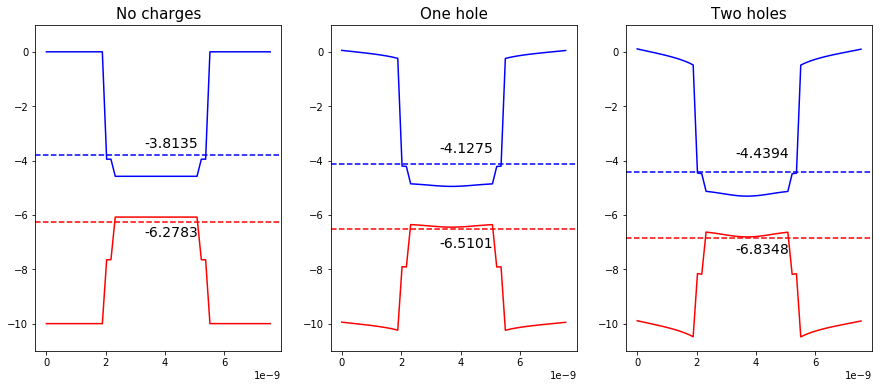

In [114]:
vc1 = a1.vcm.todense()
vc2 = a2.vcm.todense()
vc11 = np.diagonal(vc1)
vc22 = np.diagonal(vc2)

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15,6))
ax1.plot(a1.z, a0.cb[0,:a1.n], 'b')
ax1.plot(a1.z, -a0.vb[0,:a1.n], 'r')
ax1.axhline(y = np.min(a0.cb) - a0.Eg/2 + np.abs(b0.eev)[0], color = 'b', linestyle = '--')
ax1.axhline(y = -np.min(a0.vb) + a0.Eg/2 - np.abs(b0.hev)[0], color = 'r', linestyle = '--')
ax1.set_ylim([-11, 1])
ax1.set_title('No charges', fontsize = 15)
ax1.text(3.3e-9, -3.5, '{:.4f}'.format(np.min(a0.cb) - a0.Eg/2 + np.abs(b0.eev)[0]), fontsize = 14)
ax1.text(3.3e-9, -6.8, '{:.4f}'.format(-np.min(a0.vb) + a0.Eg/2 - np.abs(b0.hev)[0]), fontsize = 14)


ax2.plot(a1.z, a1.cb[0,:a1.n] + vc11[:a1.n]  , 'b')
ax2.plot(a1.z, -a1.vb[0,:a1.n] + vc11[:a1.n], 'r')
ax2.axhline(y = np.min(a0.cb) - a0.Eg/2 + np.abs(b1.eev)[0], color = 'b', linestyle = '--')
ax2.axhline(y = -np.min(a0.vb) + a0.Eg/2 - np.abs(b1.hev)[0], color = 'r', linestyle = '--')
ax2.set_ylim([-11, 1])
ax2.set_title('One hole', fontsize = 15)
ax2.text(3.3e-9, -3.7, '{:.4f}'.format(np.min(a0.cb) - a0.Eg/2 + np.abs(b1.eev)[0]), fontsize = 14)
ax2.text(3.3e-9, -7.2, '{:.4f}'.format(-np.min(a0.vb) + a0.Eg/2 - np.abs(b1.hev)[0]), fontsize = 14)


ax3.plot(a1.z, a1.cb[0,:a1.n] + vc22[:a1.n]  , 'b')
ax3.plot(a1.z, -a1.vb[0,:a1.n] + vc22[:a1.n], 'r')
ax3.axhline(y = np.min(a0.cb) - a0.Eg/2 + np.abs(b2.eev)[0], color = 'b', linestyle = '--')
ax3.axhline(y = -np.min(a0.vb) + a0.Eg/2 - np.abs(b2.hev)[0], color = 'r', linestyle = '--')
ax3.text(3.3e-9, -3.9, '{:.4f}'.format(np.min(a0.cb) - a0.Eg/2 + np.abs(b2.eev)[0]), fontsize = 14)
ax3.text(3.3e-9, -7.4, '{:.4f}'.format(-np.min(a0.vb) + a0.Eg/2 - np.abs(b2.hev)[0]), fontsize = 14)

ax3.set_ylim([-11, 1])
ax3.set_title('Two holes', fontsize = 15)